<a href="https://colab.research.google.com/github/XxIKumaxX/WiL_Siriraj/blob/main/Image_border.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Circles border

In [9]:
def circle_border(img, imagesize, margin=0):
  high, width = imagesize, imagesize
  imgresize = cv2.resize(img,(width, high))
  gray_img = cv2.cvtColor(imgresize,cv2.COLOR_GRAY2BGR)
  img_blur = cv2.medianBlur(imgresize, 5) # ปรับ blur เพื่อให้เร็วขึ้น

  # Find center point
  # cv2.HoughCircles (image, method, dp, minDist = imagesize, param1 = 100, param2 = 100, minRadius = 0, maxRadius = 0)
  # dp=1 , the accumulator has the same resolution as the input image
  circles = cv2.HoughCircles(img_blur,cv2.HOUGH_GRADIENT,1,imagesize,
                             param1=100,param2=100,minRadius=0,maxRadius=0)
  circles = np.uint16(np.around(circles))

  #Draw circle border
  for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(gray_img,(i[0],i[1]),i[2],(0,255,0),2) # circle(ภาพ, ตำแหน่งจุดศูนย์กลางวงกลม(x,y), รัศมี, สี, ความหนา)
    # draw the inner circle
    cv2.circle(gray_img,(i[0],i[1]),i[2]-margin,(0,0,255),1)

    cv2_imshow(gray_img) # cv2.imshow("Output", gray_img) กรณี run ในเครื่อง
    x = i[0]
    y = i[1]
    r = i[2]-margin
  return np.array([x,y,r]) # x,y,radius

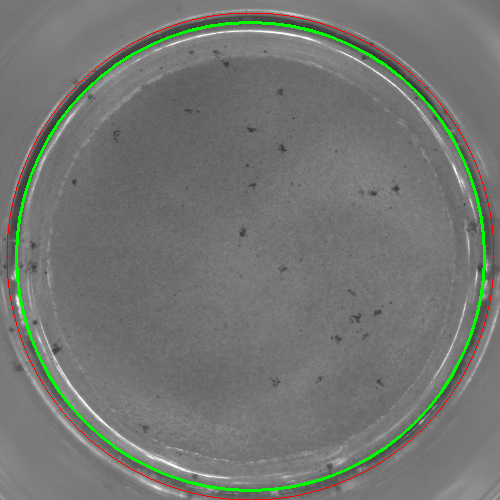

array([250, 256, 244])

In [10]:
img = cv2.imread('/content/drive/Shareddrives/Will Project/data/image data border/A2.jpg',0)
circle_border(img, 500, -10) # run 8 วินาที, หลังปรับ blur ใช้เวลาไม่ถึง 1วิ

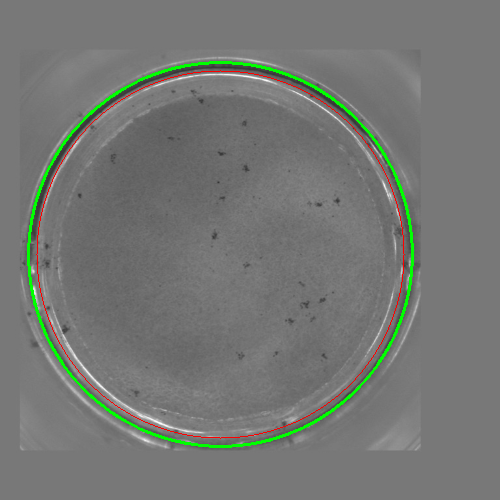

array([220, 254, 184])

In [11]:
img_left = cv2.imread('/content/drive/Shareddrives/Will Project/data/image data border/A2.1.jpg',0)
circle_border(img_left, 500, 8) # run 3 วิ , หลังปรับ blur ใช้เวลาไม่ถึง 1วิ

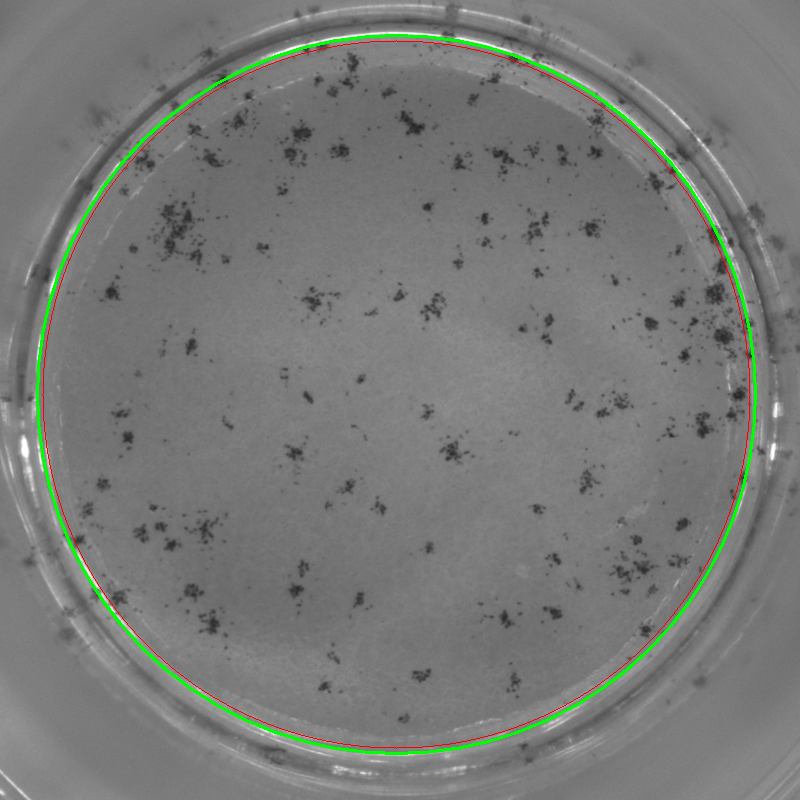

array([396, 394, 354])

In [12]:
A11 = cv2.imread('/content/drive/Shareddrives/Will Project/data/image data border/A11.jpg',0)
# imagesize = 800
circle_border(A11, 800, 5) # run 27วินาที ยิ่งรูป size ใหญ่ยิ่งนาน , หลังปรับ blur ใช้เวลา 1วิ

# Image crop

In [13]:
def crop_inner_circle(img,size,circle):
  high, width = size, size
  imgresize = cv2.resize(img,(width, high))
  gray_img = cv2.cvtColor(imgresize,cv2.COLOR_GRAY2BGR)
  x,y,r = circle

  mask = np.zeros(imgresize.shape, dtype=np.uint8)
  cv2.circle(mask,(x,y),r,(255,255,255),-1,8,0)
  result_array = imgresize & mask
  return result_array

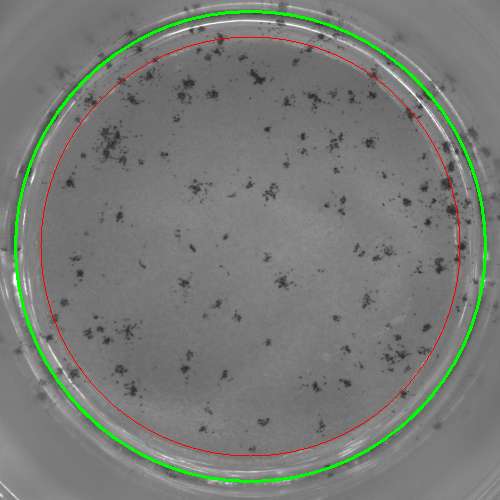

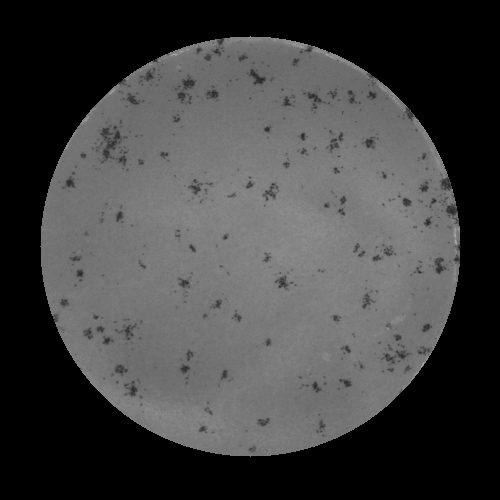

In [20]:
img = cv2.imread('/content/drive/Shareddrives/Will Project/data/image data border/A11.jpg',0)
# Example
# image size is 500, margin of inner border is -25 from outer border
circle = circle_border(img, 500, 25) # return x, y (center of circle), radius

cv2_imshow(crop_inner_circle(img,500,circle))